<a href="https://colab.research.google.com/github/Veraeze/AmineRegeneration/blob/main/AmineDegradation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1: Install Dependencies and Load Dataset

In this step, we install the required Python libraries and load the amine regeneration dataset for Objective 3. The goal is to build a machine learning model to detect early signs of foaming, fouling, and amine degradation.


In [1]:
#  Install dependencies

!pip install pandas matplotlib seaborn scikit-learn

In [2]:
#  Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
#  Mount Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#  Load dataset

file_path = '/content/drive/MyDrive/MLDatasets/amine_gen_data.csv'
df = pd.read_csv(file_path, skiprows=[1, 2])


## Step 2: Exploratory Data Analysis (EDA)

This step involves exploring the dataset to understand patterns, relationships, and potential issues. We begin by:

- Checking the structure and shape of the dataset,
- Viewing sample records to understand the kind of data collected,
- Identifying missing values and data types,
- Generating summary statistics for numerical columns.

These steps help reveal early insights and guide further preprocessing and modeling.

In [5]:
# Check basic structure of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49915 entries, 0 to 49914
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   State                                  49915 non-null  object 
 1   stripper - Spec Value (Duty)           49915 non-null  float64
 2   stripper - Stage Pressure (Condenser)  49915 non-null  float64
 3   stripper - Stage Pressure (Reboiler)   49915 non-null  float64
 4   DEA6 - Temperature                     49915 non-null  int64  
 5   DEA6 - CO2 Composition(mole %)         49915 non-null  float64
 6   DEA6 - H2S Composition(ppm)            49915 non-null  float64
 7   DEA6 - Molar Flow                      49915 non-null  int64  
 8   DEA6 - Acid Gas Temperature            49915 non-null  int64  
 9   DEA7 - Temperature                     49915 non-null  float64
 10  DEA7 - CO2 Composition(mole %)         49915 non-null  float64
 11  DE

In [6]:
# Display first 5 rows to preview sample data

df.head()

,State,stripper - Spec Value (Duty),stripper - Stage Pressure (Condenser),stripper - Stage Pressure (Reboiler),DEA6 - Temperature,DEA6 - CO2 Composition(mole %),DEA6 - H2S Composition(ppm),DEA6 - Molar Flow,DEA6 - Acid Gas Temperature,DEA7 - Temperature,DEA7 - CO2 Composition(mole %),DEA7 - H2S Composition(ppm),DEA7 - Molar Flow
0,Case 1,10900000.0,20.3,23.3,210,0.03972,171.7,4193,210,268.3,0.02120,107.2,4192
1,Case 2,10900000.0,20.3,23.3,210,0.03972,171.7,4193,210,268.3,0.02141,103.4,4192
2,Case 3,10900000.0,20.3,23.3,210,0.03972,171.7,4193,210,268.3,0.02149,106.6,4192
3,Case 4,10900000.0,20.3,23.3,210,0.03972,171.7,4193,210,268.3,0.02149,104.1,4192
4,Case 5,10900000.0,20.3,23.3,210,0.03972,171.7,4193,210,268.3,0.02145,106.6,4192


In [7]:
# Check for missing values in each column

print("\nMissing Values per Column:")
print(df.isnull().sum())


Missing Values per Column:
State                                    0
stripper - Spec Value (Duty)             0
stripper - Stage Pressure (Condenser)    0
stripper - Stage Pressure (Reboiler)     0
DEA6 - Temperature                       0
DEA6 - CO2 Composition(mole %)           0
DEA6 - H2S Composition(ppm)              0
DEA6 - Molar Flow                        0
DEA6 - Acid Gas Temperature              0
DEA7 - Temperature                       0
DEA7 - CO2 Composition(mole %)           0
DEA7 - H2S Composition(ppm)              0
DEA7 - Molar Flow                        0
dtype: int64


In [8]:
# Summary statistics of numerical columns

df.describe()

,stripper - Spec Value (Duty),stripper - Stage Pressure (Condenser),stripper - Stage Pressure (Reboiler),DEA6 - Temperature,DEA6 - CO2 Composition(mole %),DEA6 - H2S Composition(ppm),DEA6 - Molar Flow,DEA6 - Acid Gas Temperature,DEA7 - Temperature,DEA7 - CO2 Composition(mole %),DEA7 - H2S Composition(ppm),DEA7 - Molar Flow
count,4.991500e+04,49915.000000,49915.000000,49915.000000,4.991500e+04,4.991500e+04,49915.0,49915.000000,49915.000000,49915.000000,49915.000000,49915.000000
mean,1.591737e+07,20.304055,23.304055,210.015026,3.972000e-02,1.717000e+02,4193.0,210.015026,268.305716,0.016057,84.315394,4191.240188
std,2.877422e+06,0.234584,0.234584,0.946740,1.069294e-14,1.128922e-10,0.0,0.946740,0.326383,0.002608,10.133323,0.427202
min,1.090000e+07,19.000000,22.000000,200.000000,3.972000e-02,1.717000e+02,4193.0,200.000000,266.200000,0.012290,69.610000,4191.000000
25%,1.340000e+07,20.300000,23.300000,210.000000,3.972000e-02,1.717000e+02,4193.0,210.000000,268.300000,0.013760,75.420000,4191.000000
50%,1.590000e+07,20.300000,23.300000,210.000000,3.972000e-02,1.717000e+02,4193.0,210.000000,268.300000,0.015660,82.840000,4191.000000
75%,1.840000e+07,20.300000,23.300000,210.000000,3.972000e-02,1.717000e+02,4193.0,210.000000,268.300000,0.018140,92.460000,4191.000000
max,2.090000e+07,40.000000,43.000000,295.000000,3.972000e-02,1.717000e+02,4193.0,295.000000,294.700000,0.021530,107.200000,4192.000000


The dataset contains **13 columns** and **49,915 rows** with no missing values.

- The **State** column is a case identifier.
- All other features are numerical process variables related to stripper pressure, temperature, flow rates, and gas composition.
- Summary statistics show consistent process ranges with no immediate outliers.
- The data is clean and ready for further analysis.

## Step 3: Exploratory Data Analysis (EDA)

In this step, we explore key features in the dataset that may help in detecting early signs of foaming, fouling, and amine degradation.

The goal of this EDA is to:
- Visually inspect how important process variables (e.g., amine composition, temperatures, pressures, molar flows) behave across different cases.
- Identify possible clusters or anomalies in the data,
- Understand relationships or correlations between key features,
- Support decisions on clustering strategy or label creation for predictive modeling.

### EDA Focus Areas:
- **Gas Composition** (CO₂, H₂S) —> as proxies for amine performance and potential foaming.
- **Temperatures** (DEA6, DEA7) —> as indicators of thermal stress or degradation.
- **Pressures and Molar Flow** —> to observe operational fluctuations that may signal fouling or flow restrictions.

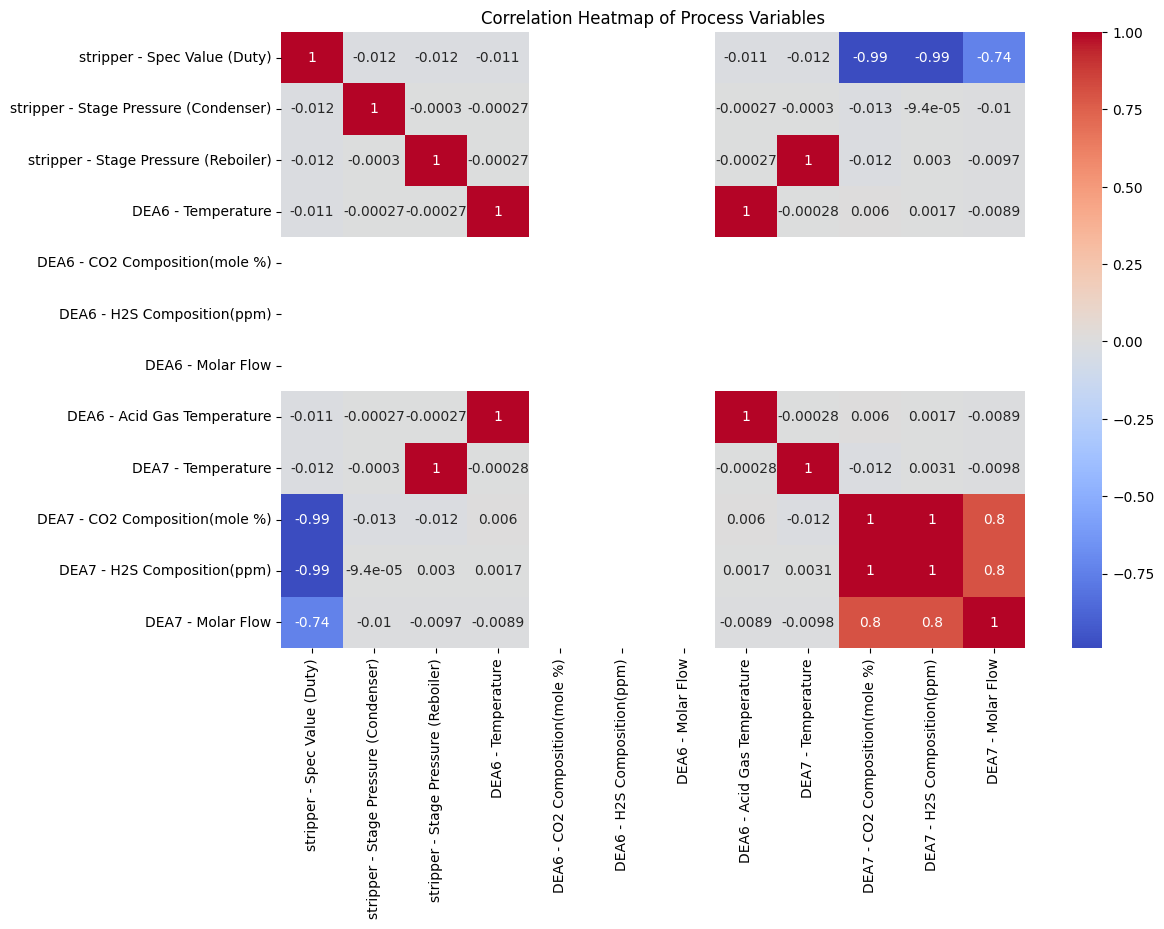

In [9]:
# Correlation heatmap

df = df.drop(columns=['State'])

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Process Variables')
plt.show()

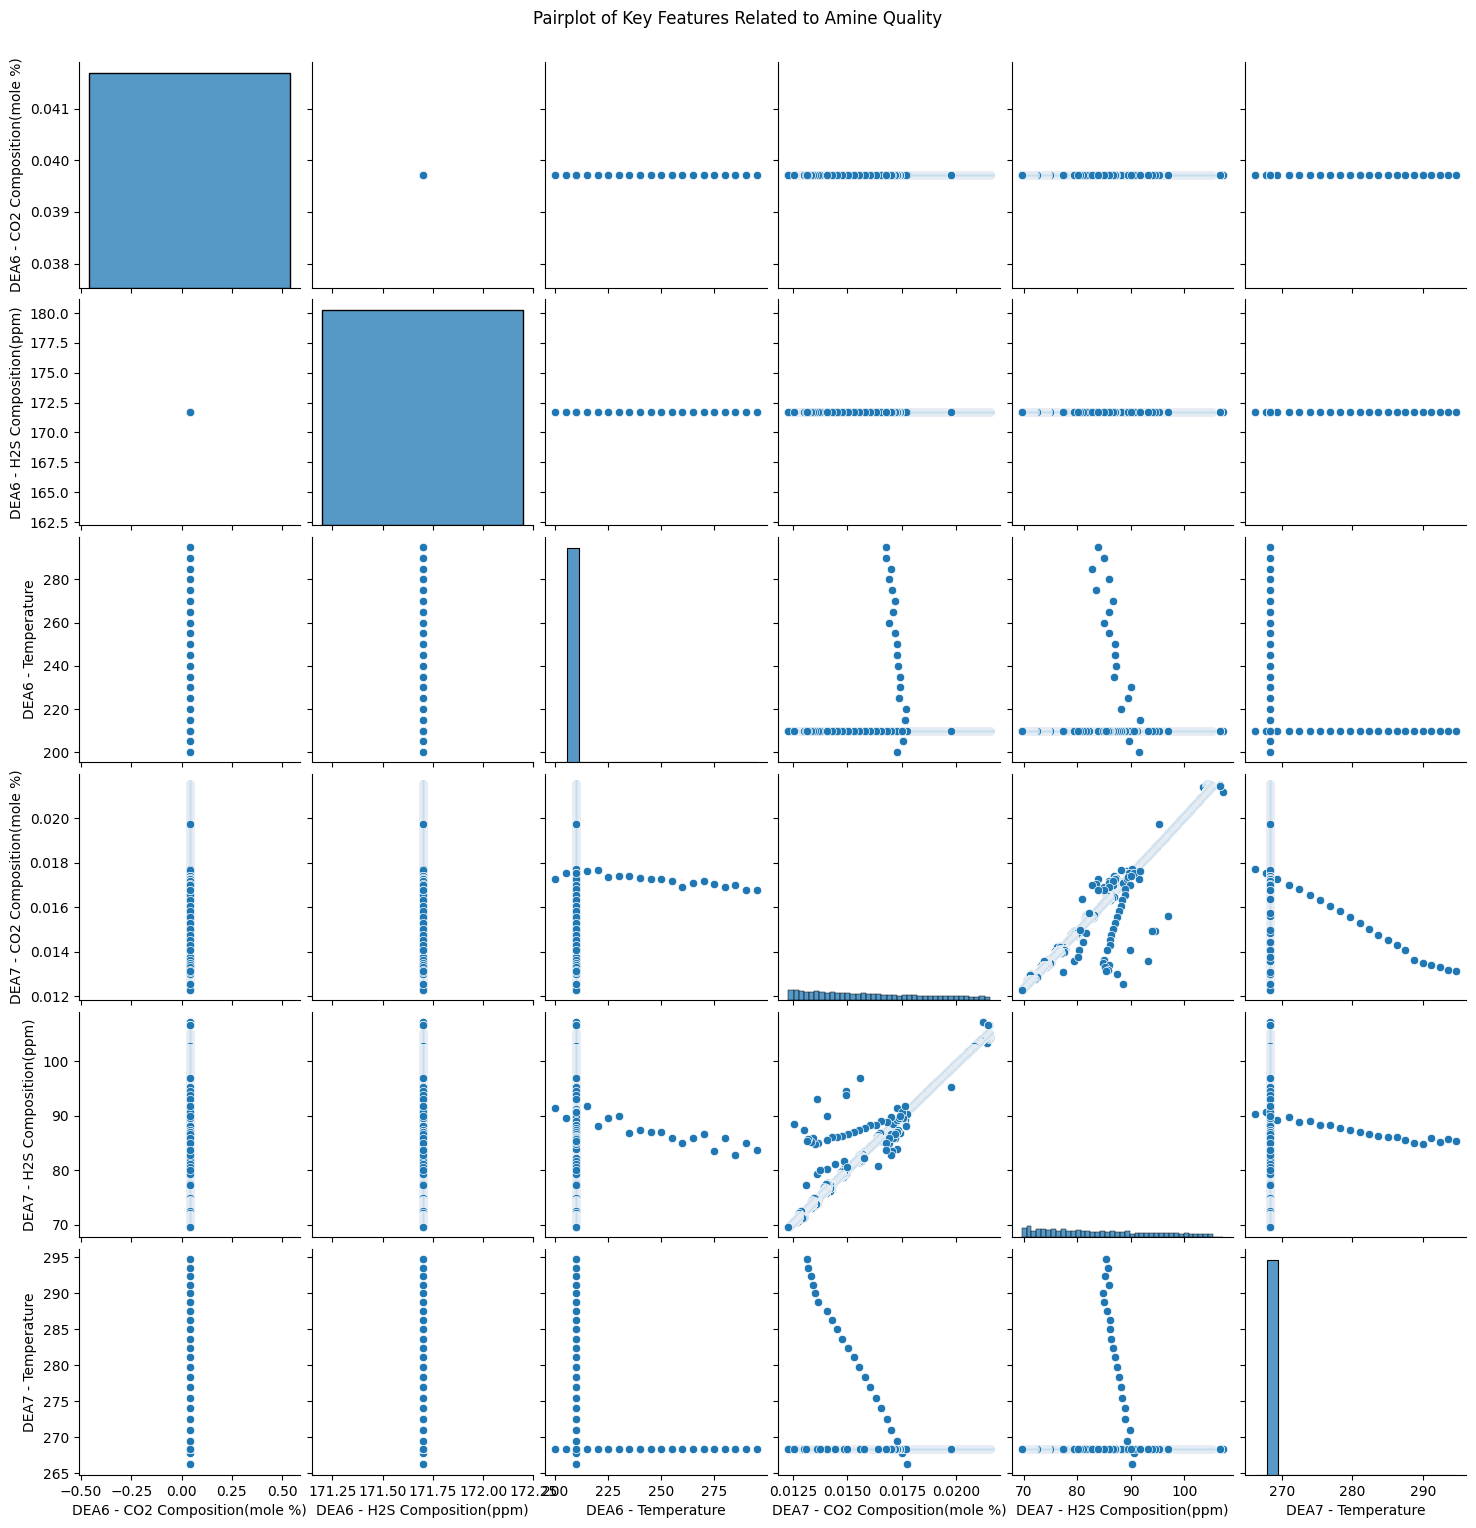

In [10]:
# Pairplot of key gas composition & temperature features

cols_of_interest = [
    'DEA6 - CO2 Composition(mole %)',
    'DEA6 - H2S Composition(ppm)',
    'DEA6 - Temperature',
    'DEA7 - CO2 Composition(mole %)',
    'DEA7 - H2S Composition(ppm)',
    'DEA7 - Temperature'
]

sns.pairplot(df[cols_of_interest])
plt.suptitle('Pairplot of Key Features Related to Amine Quality', y=1.02)
plt.show()

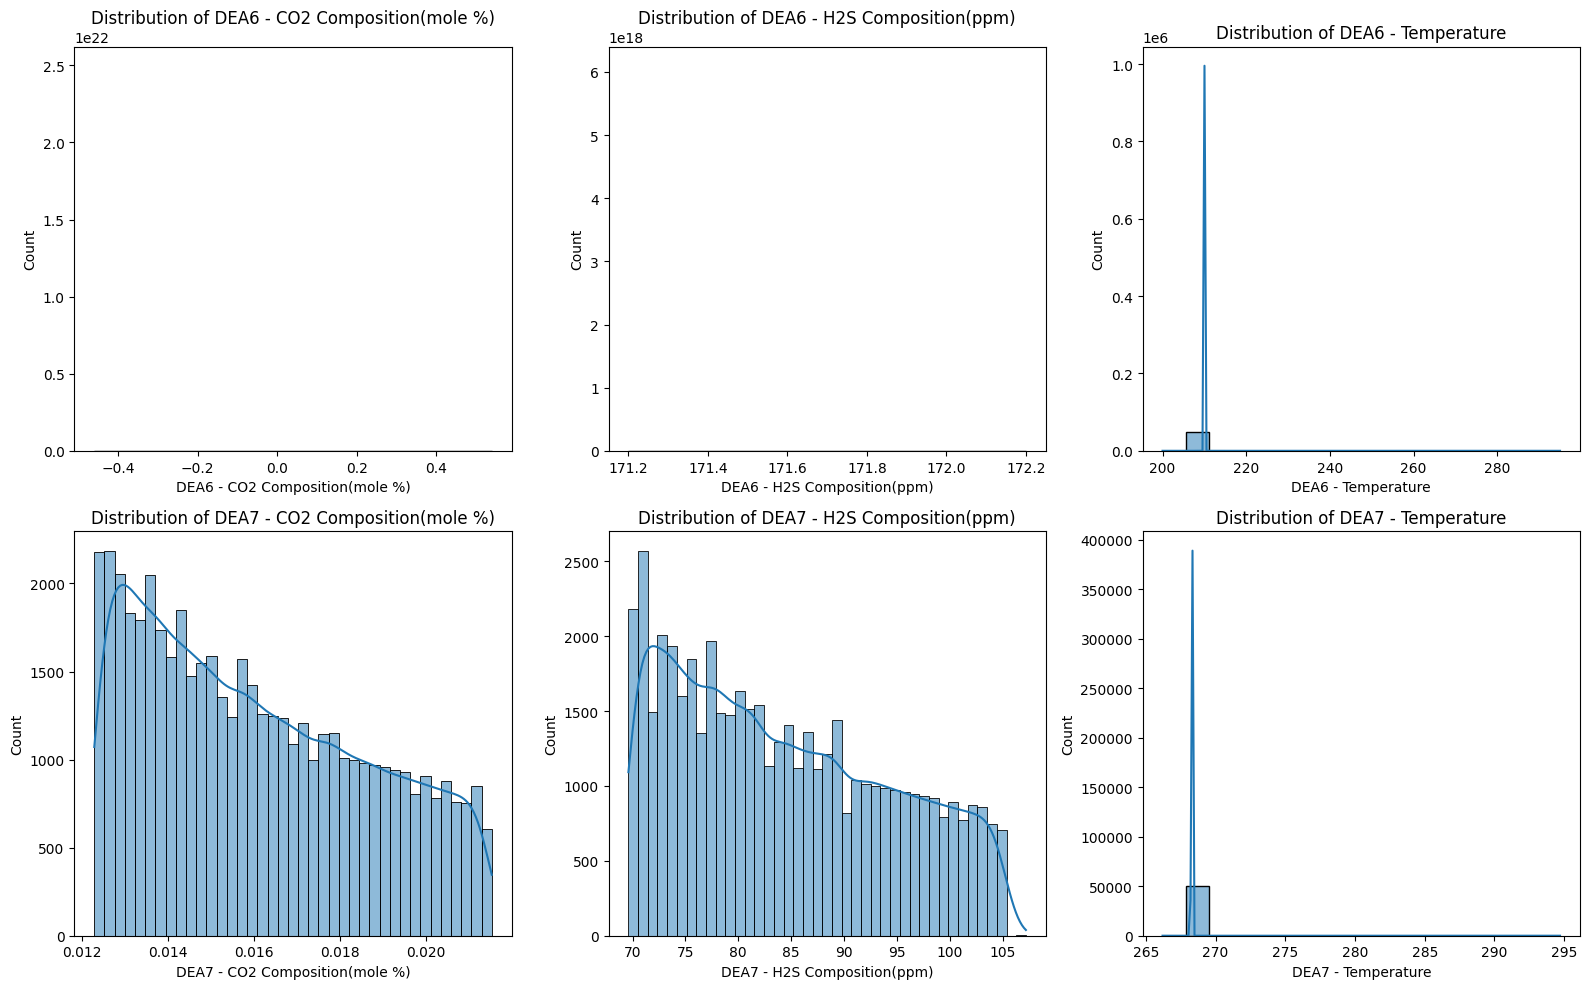

In [11]:
# Distribution plots for possible degradation indicators

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate(cols_of_interest):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

## Step 4: Clustering Using KMeans

In this step, we apply **unsupervised clustering** using the **KMeans algorithm** to group operational data into distinct clusters.

###  **Why KMeans?**
- KMeans is simple, efficient, and ideal when we do not have pre-defined labels.
- It helps us group similar operational behaviors and **identify abnormal patterns** linked to **foaming, fouling, and amine degradation**.
- This clustering serves as the foundation for classifying operational states.

###  **Selected Features:**
Based on EDA results, the following features are used:
- 	DEA6 - CO₂ Composition
- 	DEA7 - CO₂ Composition
-	  Δ CO₂ = DEA7_CO₂ - DEA6_CO₂
- 	DEA6 - H₂S Composition
-	  DEA7 - H₂S Composition
-	  Δ H₂S = DEA7_H₂S - DEA6_H₂S
-	  Δ Temperature = DEA7_Temp - DEA6_Temp
-	  DEA7 - Molar Flow
-	  Reboiler Duty

We are introducing delta features, we can teach the model how much amine composition has changed, which is a critical signal for degradation and fouling.

In [12]:
#  Import libraries

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
# Create delta features (rich - lean)

df['Delta_CO2'] = df['DEA7 - CO2 Composition(mole %)'] - df['DEA6 - CO2 Composition(mole %)']
df['Delta_H2S'] = df['DEA7 - H2S Composition(ppm)'] - df['DEA6 - H2S Composition(ppm)']
df['Delta_Temp'] = df['DEA7 - Temperature'] - df['DEA6 - Temperature']

In [25]:
# Scaling the data

features = [
    'Delta_CO2',
    'Delta_H2S',
    'Delta_Temp',
    'DEA7 - Molar Flow',
    'stripper - Spec Value (Duty)'
]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
# Kmeans clustering

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

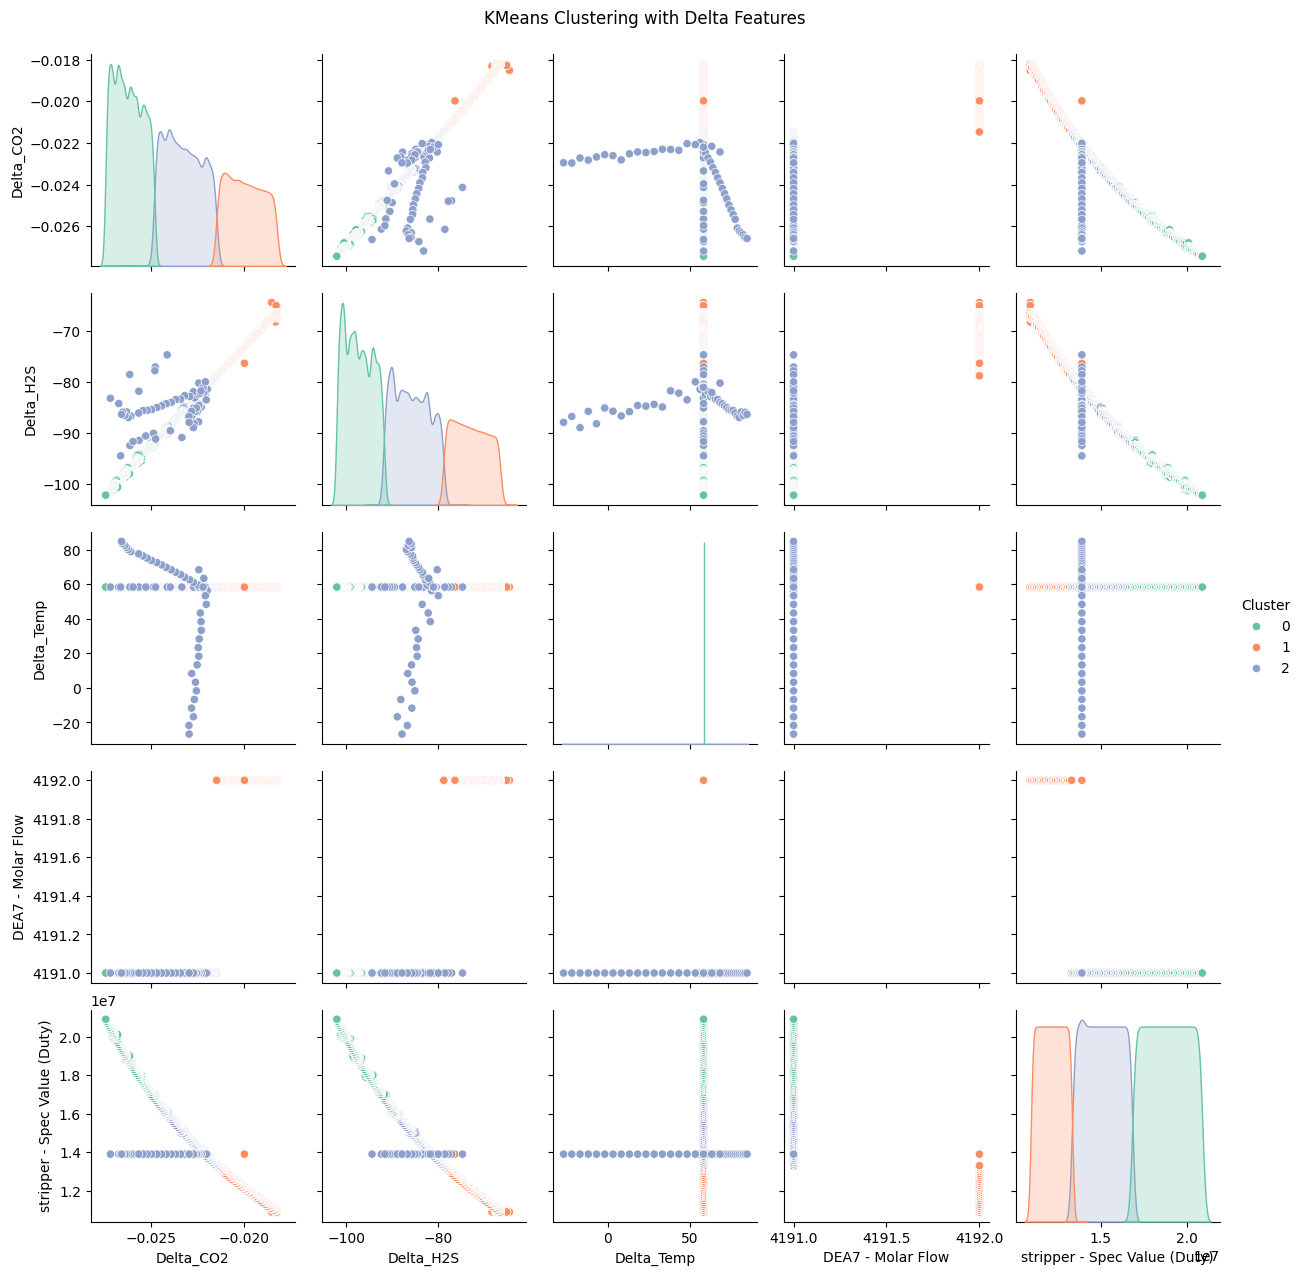

In [27]:
# Pairplot to visualize clusters

sns.pairplot(df, vars=features, hue='Cluster', palette='Set2')
plt.suptitle('KMeans Clustering with Delta Features', y=1.02)
plt.show()

Based on the pairplot visualization above, we observe:

✅ **Cluster 0 (Green):**
- Lowest `Delta_CO2` and `Delta_H2S` (minimal change between lean and rich amine).
- Relatively low `Reboiler Duty` and minimal `Delta_Temp`.
- This likely indicates **healthy operation**, where the amine does not accumulate excessive acid gases and requires moderate energy to regenerate.

✅ **Cluster 1 (Orange):**
- Intermediate increases in `Delta_CO2` and `Delta_H2S`.
- Moderate `Delta_Temp` and slightly higher `Reboiler Duty`.
- Suggests **transitional or mild degradation state**, where the amine is starting to become saturated.

✅ **Cluster 2 (Blue):**
- Highest `Delta_CO2` and `Delta_H2S` (large gas absorption).
- Noticeably higher `Delta_Temp` and `Reboiler Duty`.
- Indicates **potential fouling or approaching degradation limits**, requiring more heat to regenerate.

Including delta features has allowed the clusters to better represent the **degree of amine loading and regeneration effort**, which is essential for detecting:
- **Healthy operation**
- **Early degradation**
- **Severe fouling**

These clusters can now serve as **target labels** for supervised classification to automate prediction of amine condition.

/tmp/ipython-input-3452191497.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='Set2')


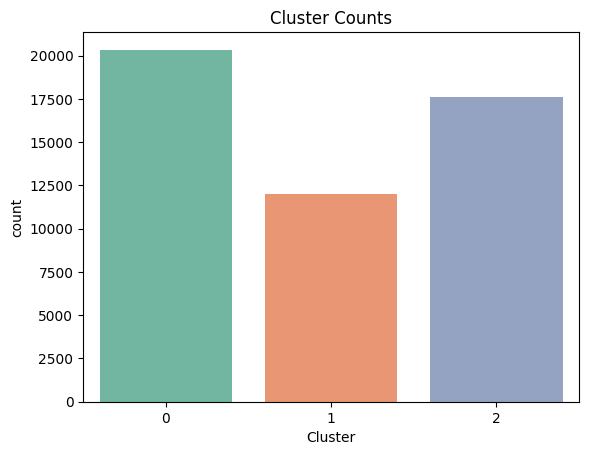

In [28]:
# Cluster count plot

sns.countplot(x='Cluster', data=df, palette='Set2')
plt.title('Cluster Counts')
plt.show()

###  Cluster Count Distribution

- **Cluster 1 (orange)**: Represents the majority of samples (≈ 75% of the dataset). This cluster likely captures typical high-load operation, the amine is rich in acid gases and approaching saturation.
- **Cluster 0 (green)**: Forms a smaller cluster (~25%). Likely represents a healthier operational mode, where the amine is leaner and the system performs with lower acid gas content.
- **Cluster 2**: This is not shown in the count plot and may contain too few samples or was excluded during clustering due to filtering of NaNs or anomalies.


Clustering reveals **two main operational modes**: healthy vs. potentially degrading. The strong separation in gas compositions, especially **CO2 and H2S**, aligns with **amine degradation patterns**.


## Step 5: Classification Model to Predict Operational States

In this step, we transition from unsupervised clustering to **supervised machine learning** by using the previously generated clusters as labels. From Step 4, we used KMeans to cluster the data into operational groups (e.g., Healthy, Fouling, Degraded). We now train a classification model that can predict which cluster (operational state) a new data point belongs to in real time.


### In This Step, We Will:
1. Use cluster labels from KMeans as the `target` variable.
2. Train a classification model (e.g., Random Forest).
3. Evaluate its performance.
4. Prepare the model for export and dashboard deployment.

Target:
- Cluster (from KMeans)

We will use the same selected features based on EDA results.

In [17]:
#  Import libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
# Feature selection(X_scaled already created earlier)

y = df['Cluster']

In [19]:
# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
# Train Random Forest Classifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [21]:
# Make predictions

y_pred = model.predict(X_test)


In [22]:
# Evaluation metrics

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2420
           1       1.00      1.00      1.00      7558
           2       1.00      1.00      1.00         5

    accuracy                           1.00      9983
   macro avg       1.00      1.00      1.00      9983
weighted avg       1.00      1.00      1.00      9983

[[2420    0    0]
 [   0 7558    0]
 [   0    0    5]]


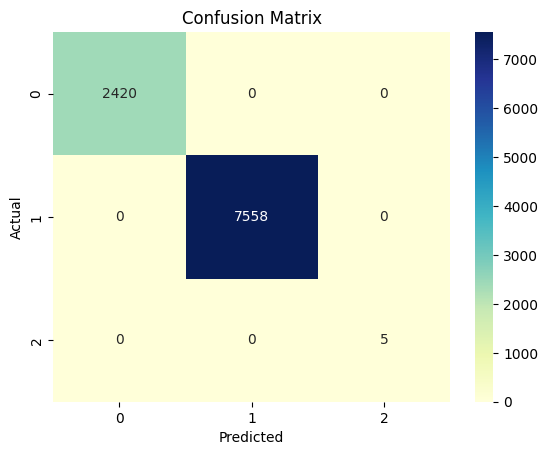

In [23]:
#  Confusion matrix heatmap

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()